Transform data into dataframe to be investigated   

In [22]:
#%pip install ydata-profiling

In [23]:
#%pip install pandas

In [24]:
#%pip install matplotlib

In [25]:
#%pip install seaborn

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sell_in = pd.read_csv('../data/sell-in.txt', sep='\t')
stocks = pd.read_csv('../data/tb_stocks.txt', sep='\t')
productos = pd.read_csv('../data/tb_productos.txt', sep='\t')

In [27]:
print("\nSell-in info:\n", sell_in.info())
print(sell_in.head())
print("\nStocks info:\n", stocks.info())
print(stocks.head())
print("\nProductos info:\n", productos.info())
print(productos.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2945818 entries, 0 to 2945817
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   periodo                int64  
 1   customer_id            int64  
 2   product_id             int64  
 3   plan_precios_cuidados  int64  
 4   cust_request_qty       int64  
 5   cust_request_tn        float64
 6   tn                     float64
dtypes: float64(2), int64(5)
memory usage: 157.3 MB

Sell-in info:
 None
   periodo  customer_id  product_id  plan_precios_cuidados  cust_request_qty  \
0   201701        10234       20524                      0                 2   
1   201701        10032       20524                      0                 1   
2   201701        10217       20524                      0                 1   
3   201701        10125       20524                      0                 1   
4   201701        10012       20524                      0                11   

   cust_re

In [28]:
print("\nSell-in period range:", sell_in['periodo'].min(), sell_in['periodo'].max())
print("Stocks period range:", stocks['periodo'].min(), stocks['periodo'].max())
print("Sell-in products:", sell_in['product_id'].nunique())
print("Stock products:", stocks['product_id'].nunique())
print("Productos products:", productos['product_id'].nunique())


Sell-in period range: 201701 201912
Stocks period range: 201810 201912
Sell-in products: 1233
Stock products: 1095
Productos products: 1251


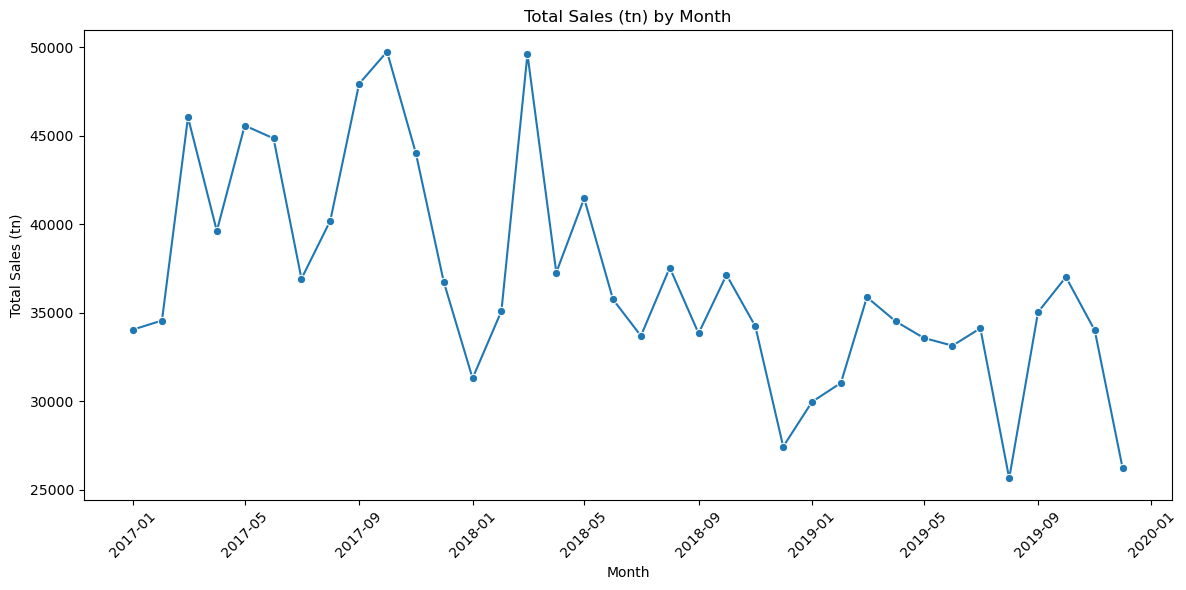

In [29]:
sales_by_month = sell_in.groupby('periodo')['tn'].sum().reset_index()
sales_by_month['periodo'] = pd.to_datetime(sales_by_month['periodo'].astype(str) + '01', format='%Y%m%d')

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_month, x='periodo', y='tn', marker='o')
plt.title('Total Sales (tn) by Month')
plt.ylabel('Total Sales (tn)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

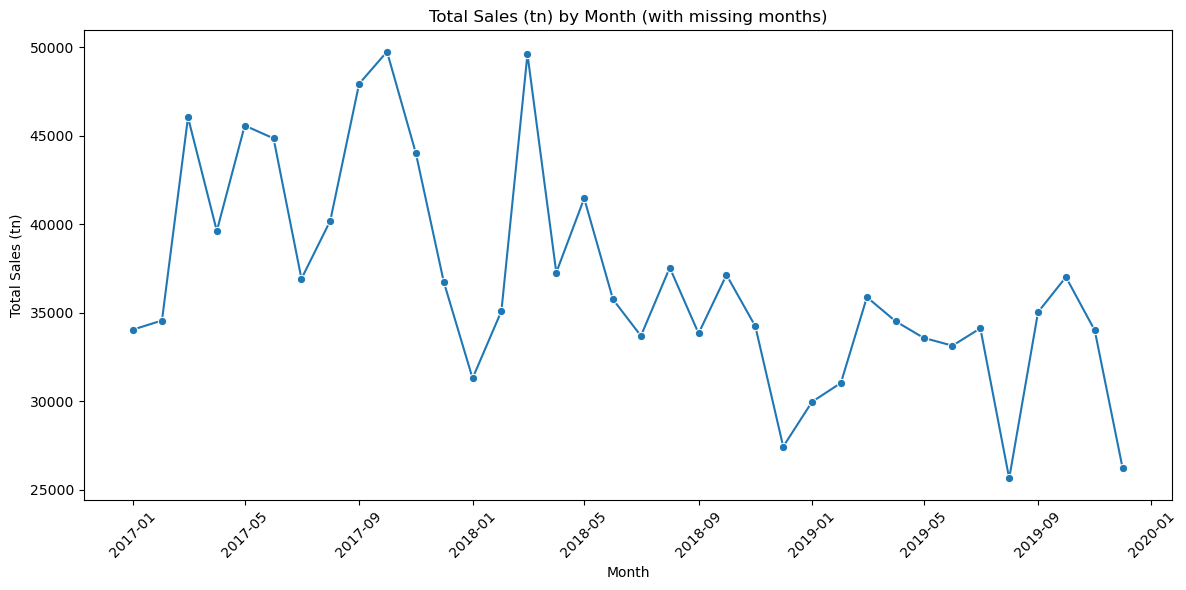

In [30]:
all_months = pd.date_range(sales_by_month['periodo'].min(), sales_by_month['periodo'].max(), freq='MS')
sales_by_month = sales_by_month.set_index('periodo').reindex(all_months).rename_axis('periodo').reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_month, x='periodo', y='tn', marker='o')
plt.title('Total Sales (tn) by Month (with missing months)')
plt.ylabel('Total Sales (tn)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

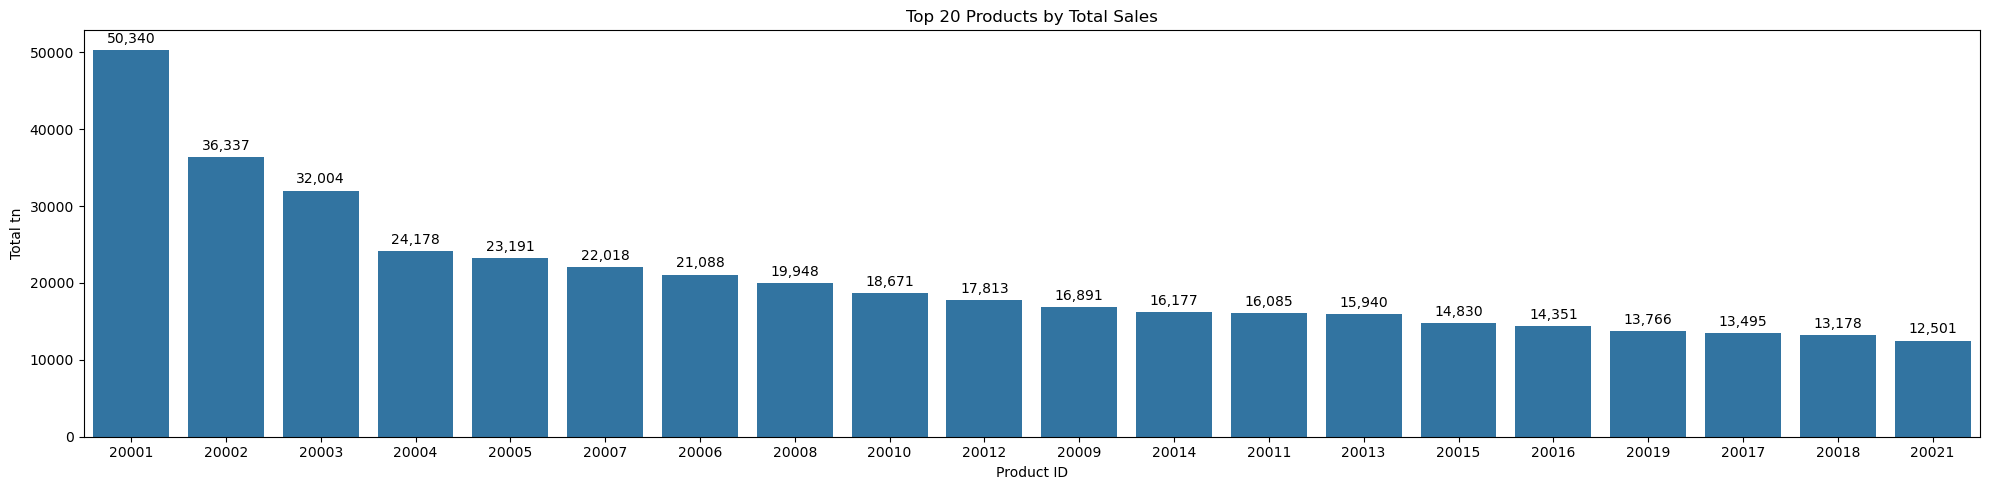

In [31]:
top_products = sell_in.groupby('product_id')['tn'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(20, 5))
ax = sns.barplot(x=top_products.index.astype(str), y=top_products.values)

plt.title('Top 20 Products by Total Sales')
plt.ylabel('Total tn')
plt.xlabel('Product ID')

# Add value labels to bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',  # formatted with thousands separator
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')

plt.tight_layout()
plt.show()

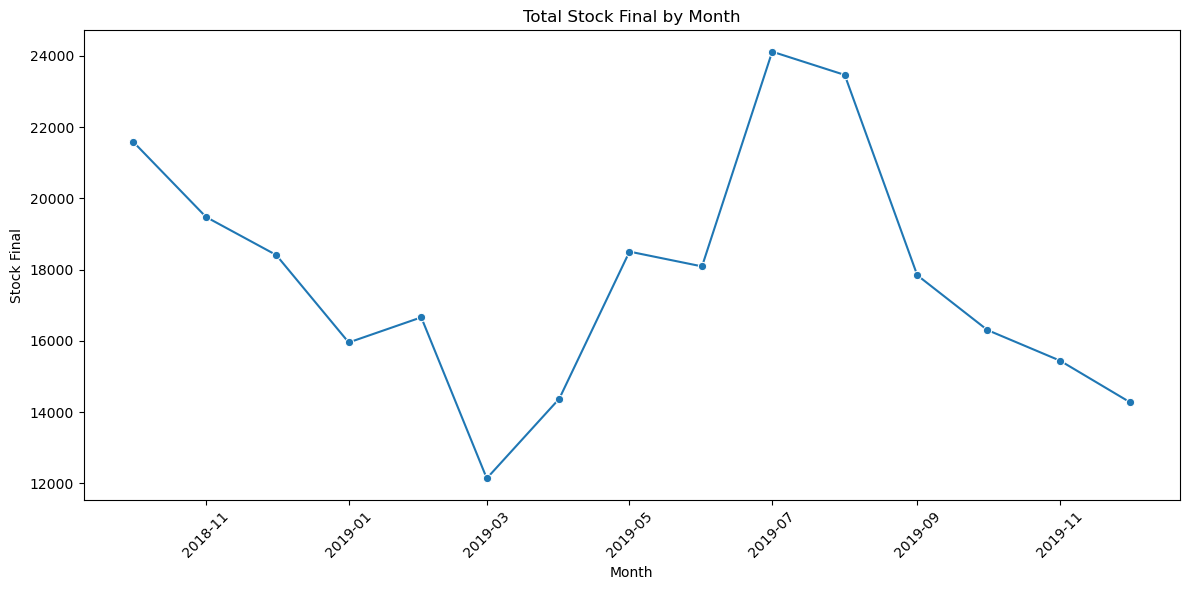

In [32]:
stock_by_month = stocks.groupby('periodo')['stock_final'].sum().reset_index()
stock_by_month['periodo'] = pd.to_datetime(stock_by_month['periodo'].astype(str) + '01', format='%Y%m%d')

plt.figure(figsize=(12, 6))
sns.lineplot(data=stock_by_month, x='periodo', y='stock_final', marker='o')
plt.title('Total Stock Final by Month')
plt.ylabel('Stock Final')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

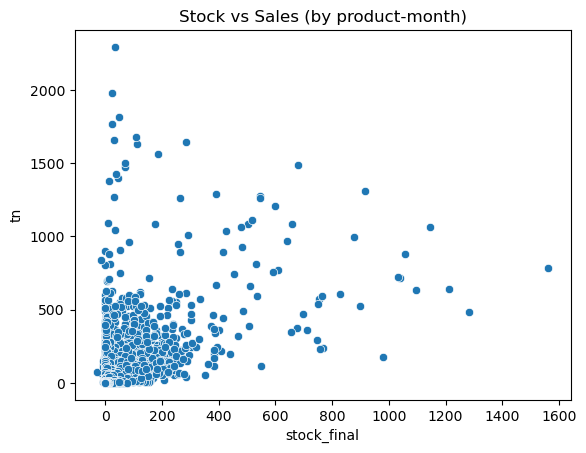

Correlation between stock and sales:
              stock_final        tn
stock_final     1.000000  0.523632
tn              0.523632  1.000000


In [33]:
sales_agg = sell_in.groupby(['periodo', 'product_id'])['tn'].sum().reset_index()
stocks_agg = stocks.groupby(['periodo', 'product_id'])['stock_final'].sum().reset_index()
df_merged = pd.merge(sales_agg, stocks_agg, on=['periodo', 'product_id'], how='inner')

sns.scatterplot(data=df_merged, x='stock_final', y='tn')
plt.title('Stock vs Sales (by product-month)')
plt.show()

corr = df_merged[['stock_final', 'tn']].corr()
print("Correlation between stock and sales:\n", corr)

In [34]:
from ydata_profiling import ProfileReport

In [36]:
# Generate the report
profile = ProfileReport(sell_in.sample(100000), title='Sell-in EDA Report', explorative=True)

# Save the report as HTML
profile.to_file('../reports/sellin_profiling_report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 94.86it/s]


In [37]:
profile_stocks = ProfileReport(stocks, title='Stocks EDA Report', explorative=True)
profile_stocks.to_file('../reports/stocks_profiling_report.html')

Export report to file: 100%|██████████| 1/1 [00:00<?, ?it/s]


In [38]:

profile_prod = ProfileReport(productos, title='Productos EDA Report', explorative=True)
profile_prod.to_file('../reports/productos_profiling_report.html')

Export report to file: 100%|██████████| 1/1 [00:00<?, ?it/s]
